In [1]:
import numpy as np
from scipy.stats import ttest_ind
import graphIO
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CALC_METHOD = 'lrc_proc'
SIGNIFICANCE_LEVEL = 0.05

In [3]:
CN_matrices = list(graphIO.read_sp_adj_matrices_from_directory(
    f"data/curvatures/CN-50/{CALC_METHOD}/", include_string=CALC_METHOD).values())

AD_matrices = list(graphIO.read_sp_adj_matrices_from_directory(
    f"data/curvatures/AD-50/{CALC_METHOD}/", include_string=CALC_METHOD).values())

In [4]:
n_rows, n_cols = CN_matrices[0].shape
p_values_matrix = np.zeros((n_rows, n_cols))

In [5]:
for i in range(n_rows):
    for j in range(n_cols):
        # Collect all elements from the current position across all matrices in each class
        values_a = np.array([matrix[i, j] for matrix in CN_matrices])
        values_b = np.array([matrix[i, j] for matrix in AD_matrices])

        # Perform the two-sample t-test for the current position
        _, p_value = ttest_ind(values_a, values_b)
        p_values_matrix[i, j] = p_value

In [6]:
num_p_values_below_significance = len(p_values_matrix[p_values_matrix < SIGNIFICANCE_LEVEL])
print(f"The number of p-values below the significance level is: {num_p_values_below_significance}")

The number of p-values below the significance level is: 1798


In [7]:
np.savetxt(
    f"C:/Users/mosta/OneDrive - UNCG/Academics/CSC 699 - Thesis/output/p_values_matrix_{CALC_METHOD}.csv", p_values_matrix, delimiter=",")

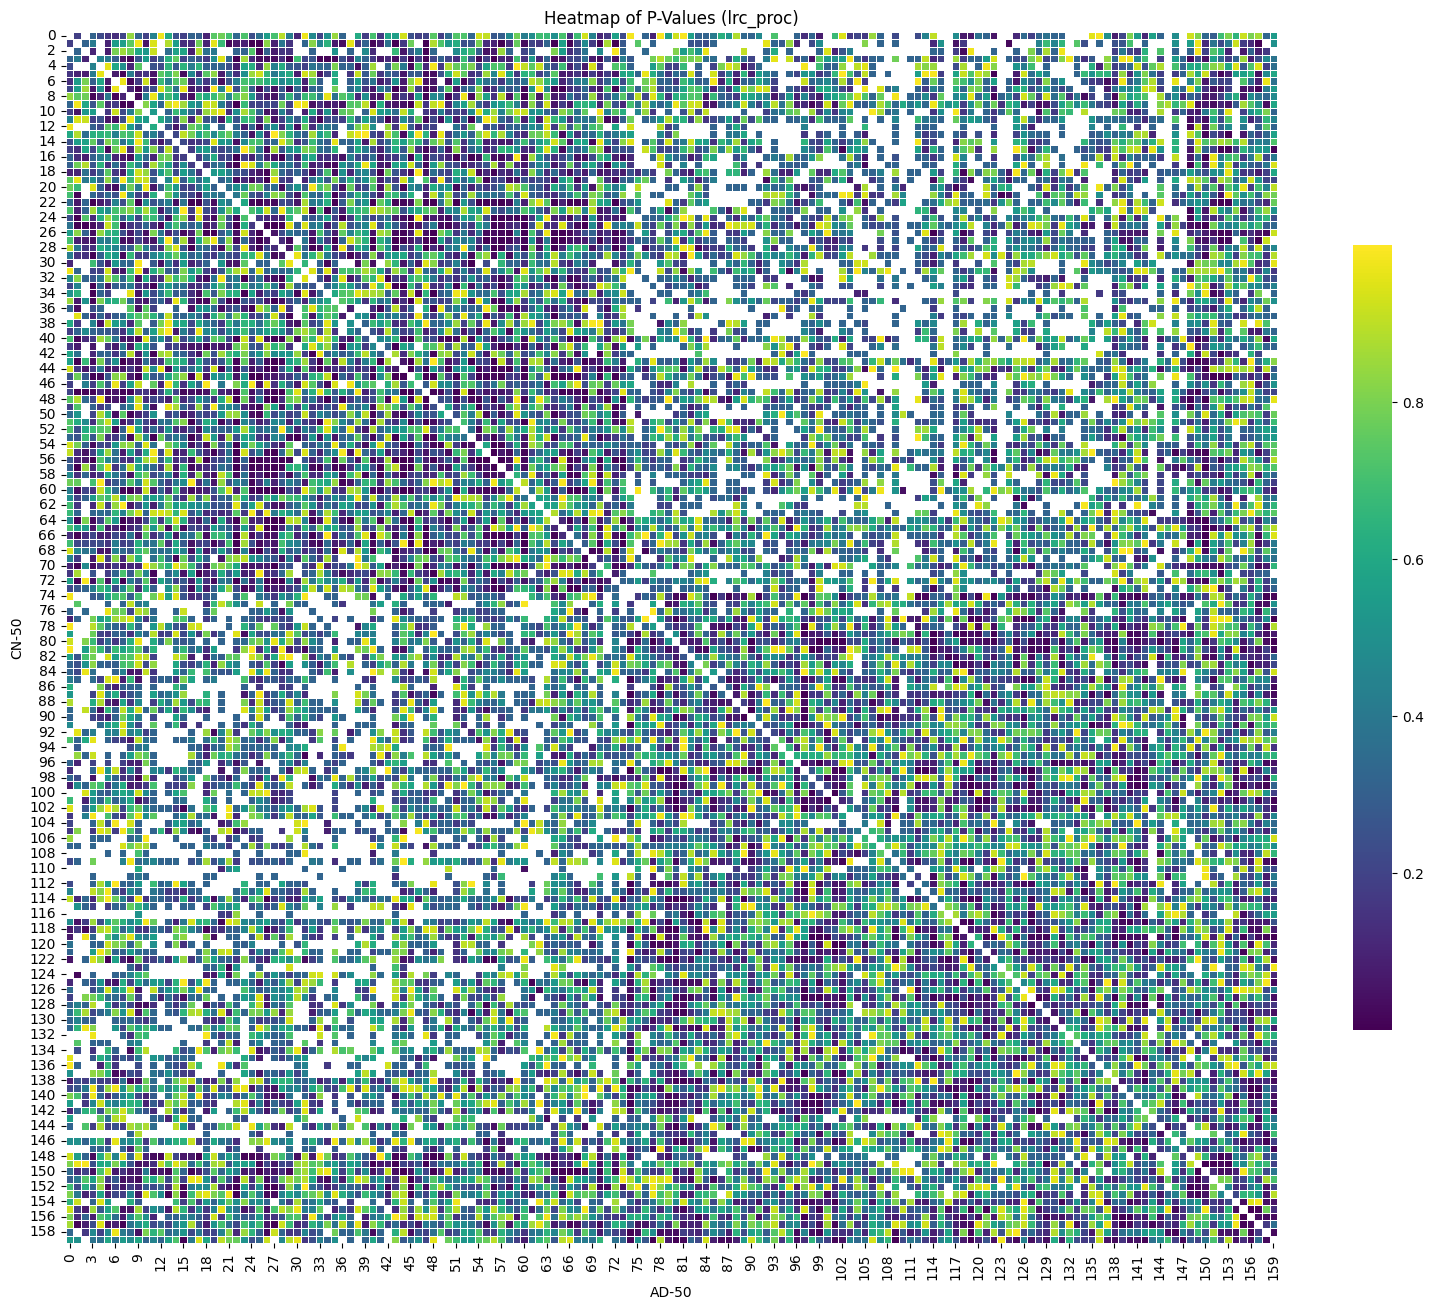

In [8]:
# Plotting the heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(p_values_matrix, cmap='viridis', cbar=True, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.title(f'Heatmap of P-Values ({CALC_METHOD})')
plt.xlabel('AD-50')
plt.ylabel('CN-50')
plt.tight_layout()
plt.show()

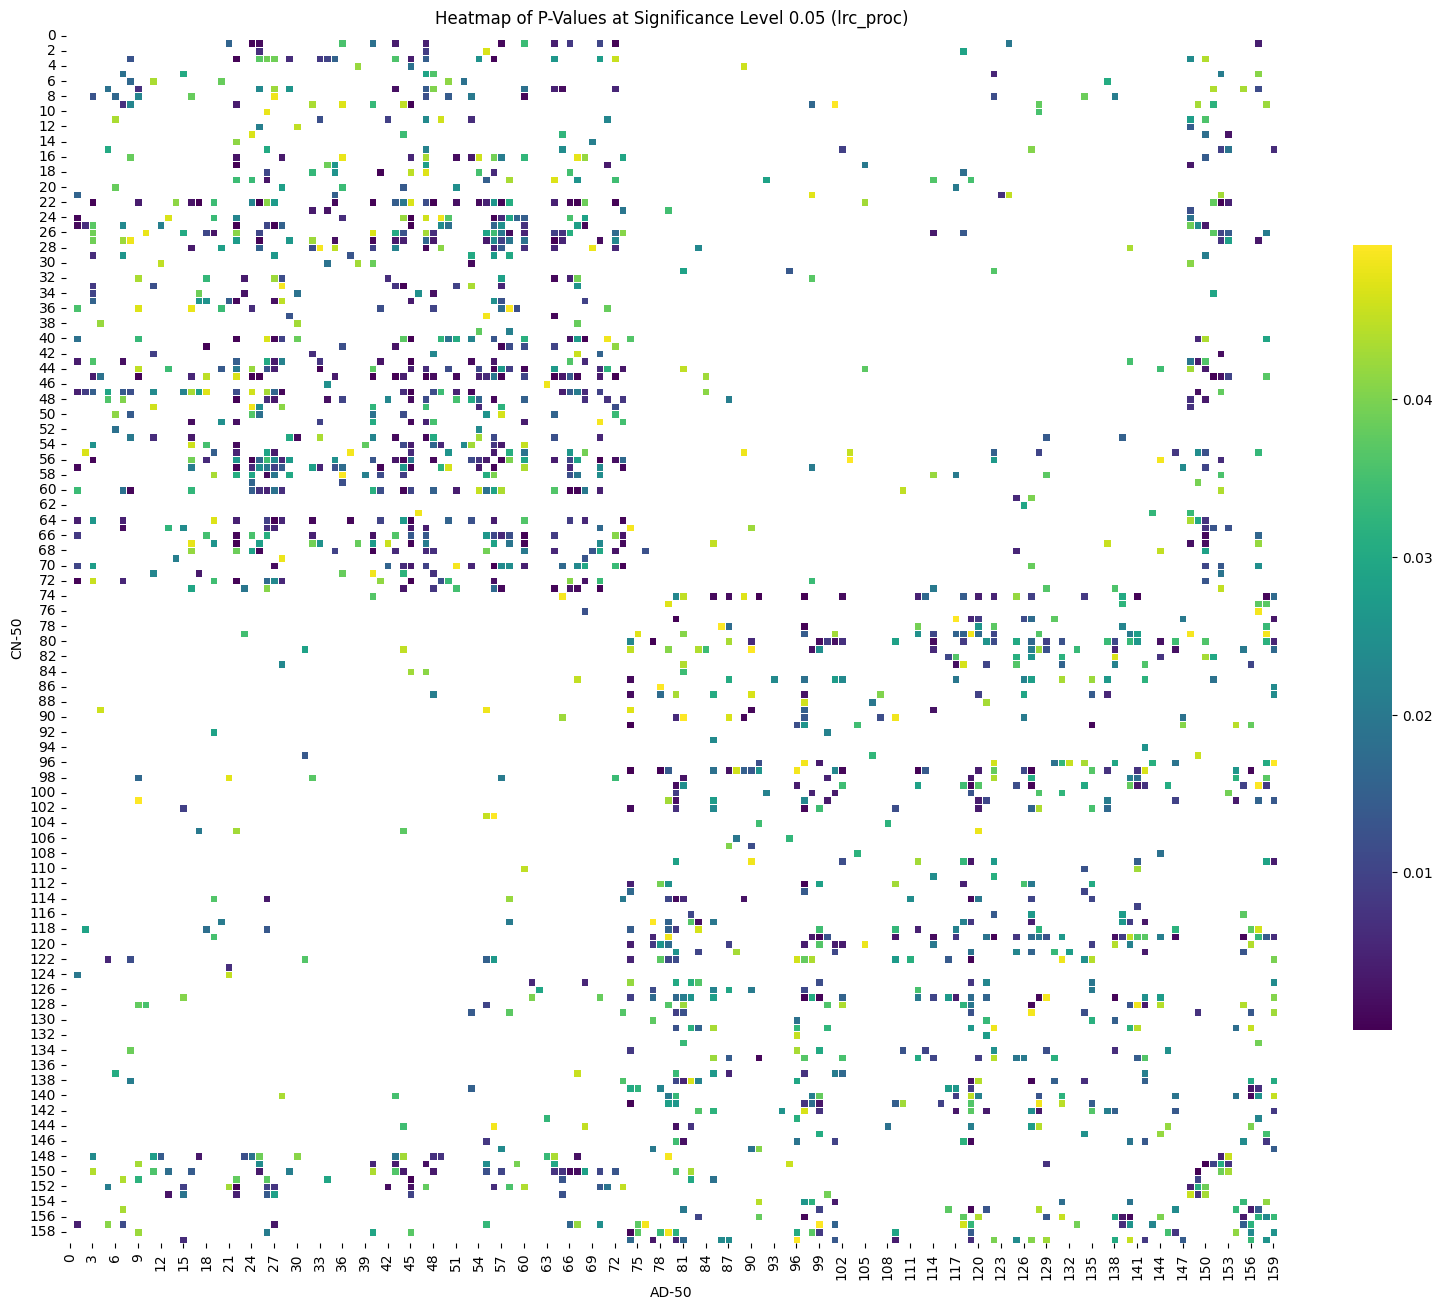

In [9]:
# Replace values above significance level with nan
p_values_matrix[p_values_matrix >= SIGNIFICANCE_LEVEL] = np.nan

# Plotting the heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(p_values_matrix, cmap='viridis', cbar=True, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.title(
    f'Heatmap of P-Values at Significance Level {SIGNIFICANCE_LEVEL} ({CALC_METHOD})')
plt.xlabel('AD-50')
plt.ylabel('CN-50')
plt.tight_layout()
plt.show()

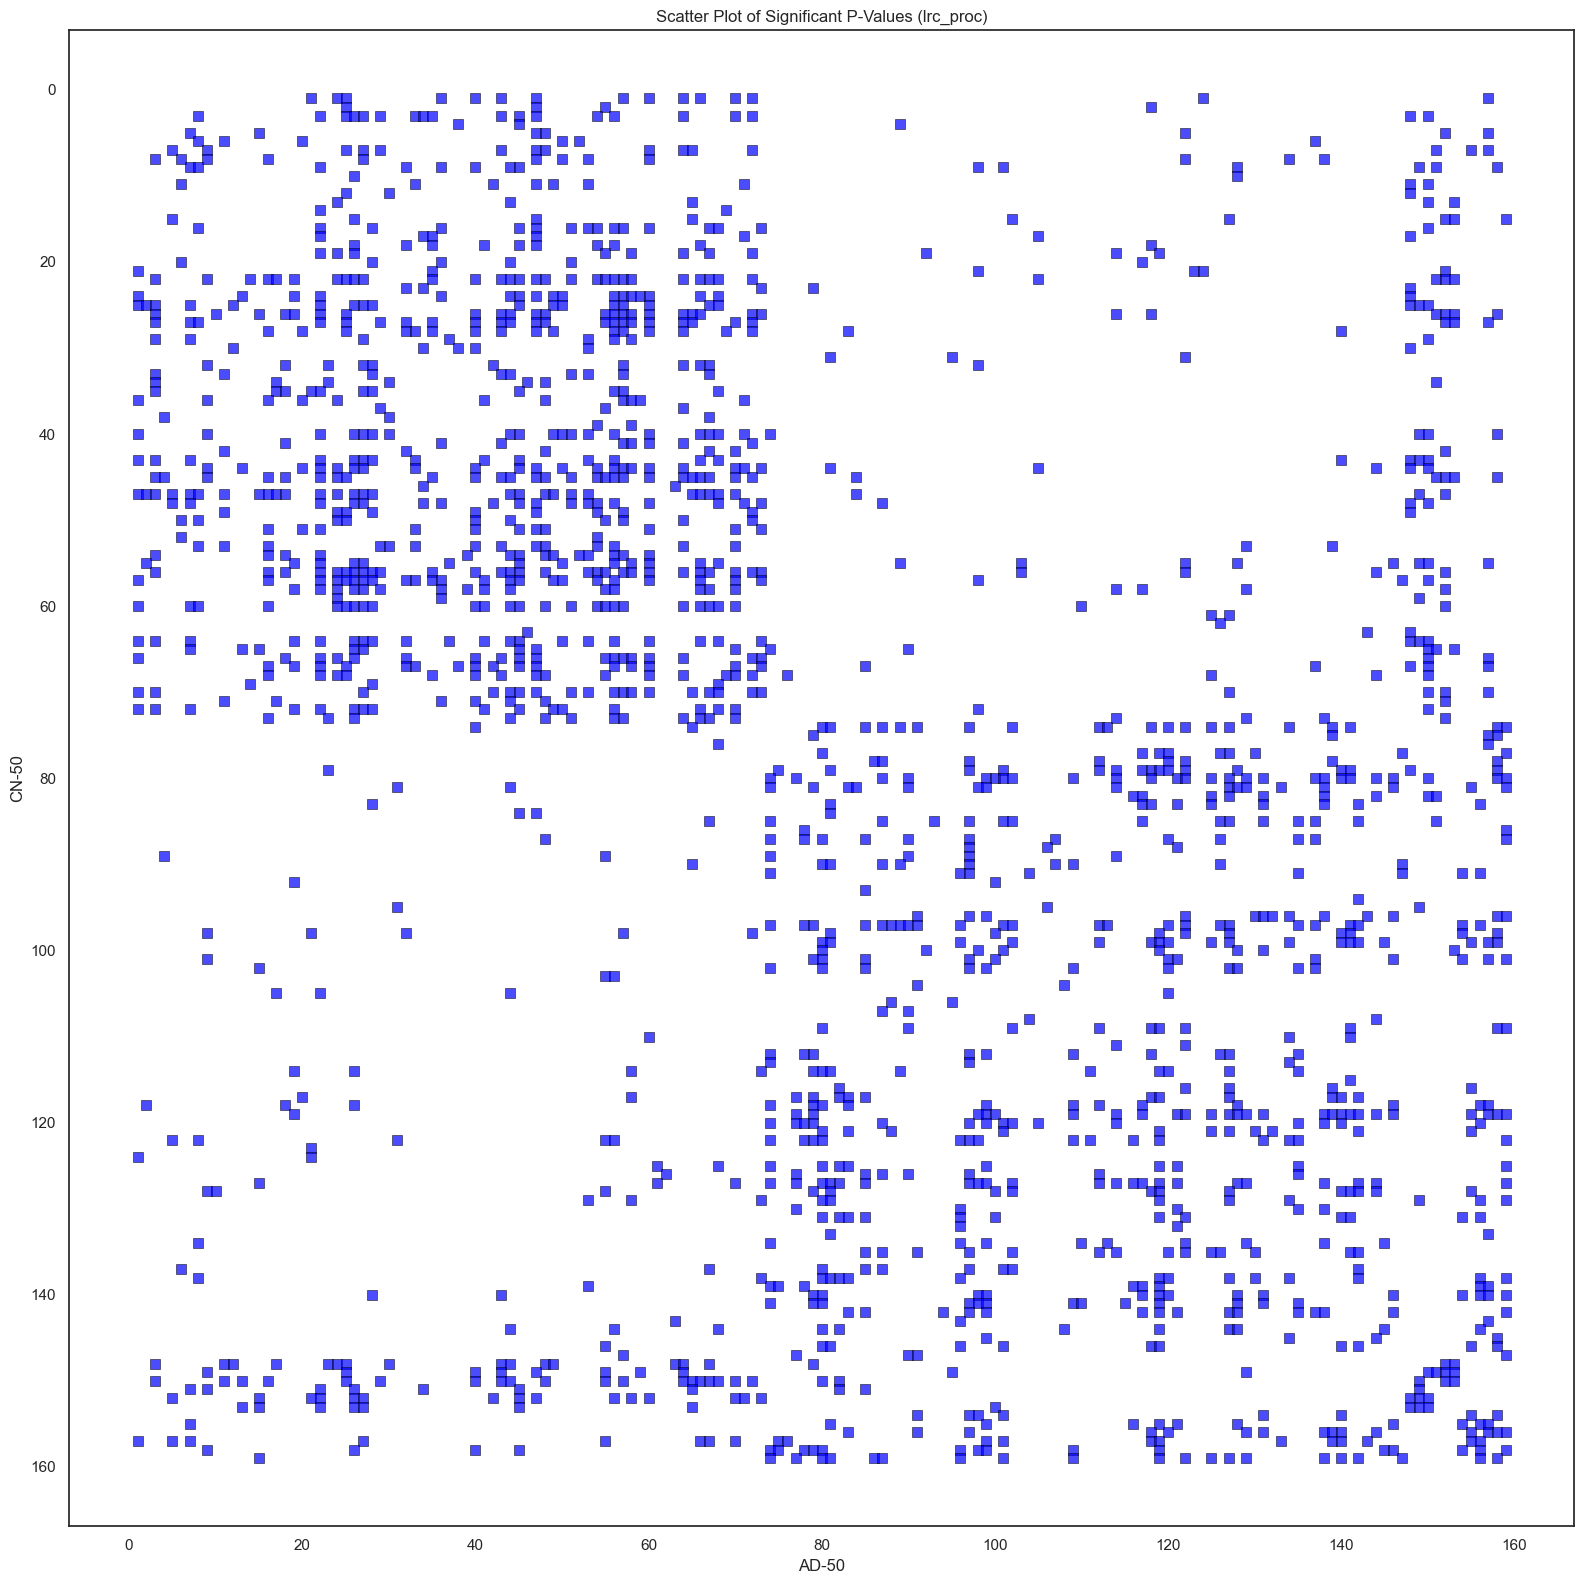

In [17]:
significant_indices = np.argwhere(p_values_matrix < SIGNIFICANCE_LEVEL)

x_coords = significant_indices[:, 1]
y_coords = significant_indices[:, 0]
# Set the style and color map
sns.set_theme(style='white')

# Create the scatter plot
plt.figure(figsize=(16, 16))
sns.scatterplot(x=x_coords, y=y_coords, marker='s', color='blue', edgecolor='black', linewidth=0.5, s=50, alpha=0.7)
plt.title(f'Scatter Plot of Significant P-Values ({CALC_METHOD})')
plt.xlabel('AD-50')
plt.ylabel('CN-50')

# Invert the y-axis
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()